<center>
    <h1>Xây dựng mô hình bằng phương pháp K-Means Clustering</h1>
</center>

<h3>Khai báo các thư viện cần thiết</h3>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import idx2numpy

Để có thể kiểm tra chương trình nhanh chóng, chúng em sẽ tạo bộ dữ liệu mẫu

In [28]:
X1 = np.random.normal(70, 10, 50)
Y1 = np.random.normal(70, 10, 50)

X2 = np.random.normal(40, 10, 50)
Y2 = np.random.normal(40, 10, 50)

X3 = np.random.normal(10, 10, 50)
Y3 = np.random.normal(80, 10, 50)

# X4 = np.random.normal(20, 1, 50)
# Y4 = np.random.normal(55, 1, 50)

X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))

X_bar = np.vstack((X, Y))
X_bar.shape

(2, 100)

## Thuật toán phân cụm K-Means

Ý tưởng đơn giản nhất về cụm là tập hợp những điểm nằm ở gần nhau trong một không gian nào đó. Không gian có thể có nhiều chiều khi dữ liệu rất lớn.

Giả sử, ta đặt

$$X = [x_1, x_2, x_3, ... x_N] \in \mathbb{R}^{d \times N}$$

$$M = [m_1, m_2, ... m_k] \in \mathbb{R}^{d \times 1}$$

Với mỗi $x_i$ được phân vào cluster $k$ thì

$$y_{ik} = 1 \quad và \quad y_{ij} = 0; \qquad j \ne k$$

Ràng buộc của của $y_i$ có thể được viết dưới dạng toán học như sau

$$y_{ik} \in \left \{ 0, 1 \right \}, \quad  \sum_{k = 1}^{k} y_{ik} = 1 \qquad \qquad (1)$$

$m_k$ là trung tâm của mỗi cụm cluster, nếu tất cả các cụm được phân vào cluster bởi $m_k$ thì, mỗi điểm dữ liệu $x_i$ khi phân vào cluster $k$ thì sẽ có sai số là $(x_i - m_k)$.

Vậy, sai số của một điểm dữ liệu $x_i$ là:
$$\left \| x_i - m_k \right\|_2^2 = y_{ik} \|x_i - m_k\|_2^2 = \sum_{j = 1}^{K} y_{ij} \|x_i - m_k\|_2^2$$

Như vậy, sai số của toàn bộ điểm dữ liệu là:

$$L(Y, M) = \sum_{i = 1}^{N}\sum_{j=1}^{K} \|x_i - m_k\|_2^2$$

Trong đó $Y = [y_1, y_2, y_3,...y_N]$ và $M = [m_1, m_2, ... m_k]$

Như vậy, chúng ta cần tối ưu bài toán với điều kiện ở $(1)$:

$$Y, M = \arg \min_{Y,M} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \left \| x_i - m_j \right \|_2^2 \qquad (2) \\ s.t: y_{ij} \in \{0, 1\} \quad \forall i, j; \qquad \sum_{j=1}^{K}y_{ij} = 1 \quad \forall i$$


Để giải bài toán này, ta có thể tiếp cận theo hướng đơn giản. Đó xen kẽ giải $Y$ và $M$ khi biến còn lại được cố định.
Như vậy, ta sẽ giải xen kẽ 2 bài toán con như sau:

**Cố định $M$, tìm $Y$** 

Mục đích của bài toán này là tìm được bộ các label vector để hàm mất mát đạt giá trị nhỏ nhất. Điều này có nghĩa là ta sẽ tìm cụm cho mỗi điểm dữ liệu.

Bài toán $(2)$ được chia nhỏ thành bài toán tìm label vector cho một điểm dữ liệu $i$ như sau:

$$y_i = argmin \sum_{j = 1}^{K} y_{ij} \|x_i - m_j\|_2^2 \qquad (3) \\ s.t: y_{ij} \in \{0, 1\}; \qquad \sum_{j = 1}^{k}y_{ij} = 1$$

Ta có thể viết lại bài toán $(3)$ như sau:

$$j = argmin \|x_i - m_j\|_2^2$$  

Điều này có thể hiểu rằng ta đang cố gắng tìm tâm cụm gần với điểm $x_i$ nhất. Với $\|x_i - m_j\|$ là khoảng cách từ $x_i$ đến tâm $m_j$

**Cố định $Y$, tìm $M$** 

Mục đích của bài toán này là tìm được các tâm cụm mới của mỗi cụm sau khi tìm được các label vector sao cho hàm mất mát đạt giá trị nhỏ nhất.

Sau khi có được các label vector bài toán $(2)$ được rút gọn thành bài toán tìm center cho một cluster như sau:

$$m_j = argmin \sum_{i = 1}^{N} y_{ij} \|x_i - m_j\|_2^2 \qquad (4)$$

Bài toán này giải nó bằng đạo hàm theo ẩn $m_j$. Để thuận tiện, chúng ta đặt $g(m_j) = \sum_{i = 1}^{N} y_{ij} \|x_i - m_j\|_2^2$ hàm bên trong dấu $argmin$. Ta sẽ có đạo hàm như sau:

$$\frac{ \partial g(m_j)} {\partial m_j} = 2 \sum_{i = 1}^{N} y_{ij} (x_i - m_j) = 0$$

$$-> 2 \sum_{i = 1}^{N} (y_{ij}x_i - y_{ij}m_j) = 0 \\

->\sum_{i = 1}^{N} y_{ij}x_{i} = \sum_{i = 1}^{N} y_{ij}m_j \\
$$

Như vậy, rút $m_j$ ra, ta được:
$$m_j = \frac{\sum_{i = 1}^{N} y_{ij}x_{i}} {\sum_{i = 1}^{N} y_{ij}}$$


Chúng em xin phép được tóm tắt thuật toán như sau

Đầu vào: Dữ liệu X và số lượng cluster cần tìm K.

Đầu ra: Các center M, label vector, và cost

1. Chọn K điểm bất kỳ làm các center ban đầu
2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất
3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi nhiều thì ta dừng thuật toán
4. Cập nhật các center cho từng cluster bằng cách lấy trung bình cộng của các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
5. Quay lại bước hai

In [29]:
def myKmeans(X_bar, k):
    J_history = []
    Label_history = []
    C_history = []
    for seed in range(1000):
        c = np.array([0 for i in range(X_bar.shape[1])])
        centroids = np.array([[np.random.randint(1,100) for x in range(X_bar.shape[0])] for i in range(k)])
        cost = 0

        for i in range(1000):
            distances = [np.linalg.norm(X_bar.T - centroid, axis=1) for centroid in centroids]
            
            if k == 1:
                J_history.append(np.mean(distances))
                Label_history.append(c)
                C_history.append(centroids)
                break

            index = np.argmin(distances, axis=0)
            
            if len(set(index)) == k:
                c = index
            else: 
                break
            
            distances_ci_x = np.array([])
            for j in range(k):
                distances_ci_x_j = np.linalg.norm(X_bar.T[np.where(c == j), :][0] - centroids[j], axis=1)
                distances_ci_x = np.concatenate((distances_ci_x, distances_ci_x_j), axis=0)
            # print(distances_ci_x_j.shape)

            for i, centroid in enumerate(centroids):
                centroids[i] = np.mean(X_bar[:,c == i], axis=1)

            if (i != 0) and (abs(cost - np.mean(distances_ci_x)) < 0.005):
                # print(f"Seed at {seed}, Stop at i = {i} and cost = {cost}")
                J_history.append(cost)
                Label_history.append(c)
                C_history.append(centroids)
                break
            else:
                cost = np.mean(distances_ci_x)
                # print(f"Seed at {seed}, Cost at i = {i} is {cost}")
    
    cost = min(J_history)
    index = np.argmin(J_history)
    c = Label_history[index]
    centroids = C_history[index]
    return cost, index, c, centroids

Trước tiên, chúng em sẽ thử với bộ dữ liệu test xem kết quả chạy ra có tốt hay không.



Cost = 10.564895281509004, 
Index=5,
Centroid: 
 [[69 69]
 [48 36]
 [32 46]]


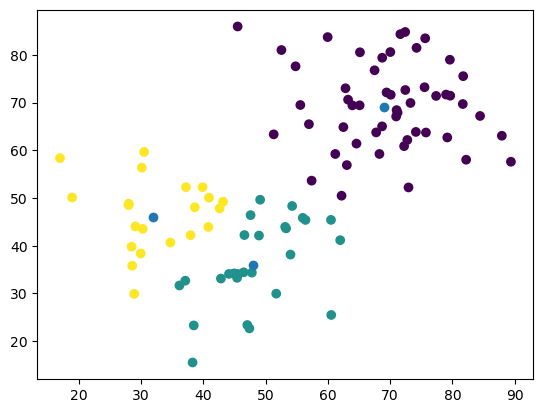

In [30]:
cost, index, c, centroids = myKmeans(X_bar, 3)
print(f"\nCost = {cost}, \nIndex={index},\nCentroid: \n {centroids}")
plt.clf()
plt.scatter(X_bar[0], X_bar[1], c=c)
plt.scatter(centroids.T[0],centroids.T[1])
plt.show()

### Enboil

Để có thể chọn ra tâm cụm tối ưu, chúng em sử dụng phương pháp Enboil. Chọn ra số cụm đảm bảo tốt nhất

In [31]:
K = range(1, 10)
COST = []
for i in K:
    cost, _, _, _ = myKmeans(X_bar, i)
    print(i, cost)
    COST.append(cost)


1 22.641320614272203
2 12.216056481485442
3 10.564895281509004
4 9.3571659042149
5 8.32458270496155
6 7.603238805663008
7 7.133146241083251
8 6.686401028063541
9 6.1782948804411175


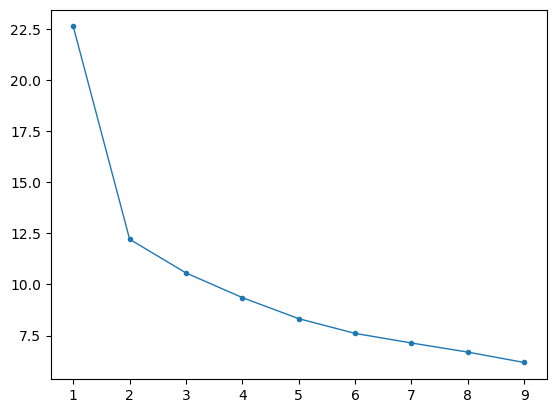

In [32]:
plt.plot(K, COST,'-o', linewidth=1, markersize = 3)
plt.show()

Như hình trên, ta có thể thấy, số cụm tốt nhất là bằng 2 hoặc 3, tùy theo nhu cầu của người dùng.

### So sánh kết quả cụm với thư viện Sklearn

In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_bar.T)
model.cluster_centers_

array([[69.94426087, 70.0842038 ],
       [49.5049209 , 37.19952444],
       [32.57803475, 46.66238665]])

## Áp dụng K-Means vào bộ dữ liệu chữ viết tay.

In [34]:
X_train_dir = './data/train-images.idx3-ubyte'
y_train_dir = './data/train-labels.idx1-ubyte'
X_val_dir = './data/t10k-images.idx3-ubyte'
y_val_dir = './data/t10k-labels.idx1-ubyte'

X_train = idx2numpy.convert_from_file(X_train_dir).reshape(60000, -1)
y_train = idx2numpy.convert_from_file(y_train_dir)
X_val = idx2numpy.convert_from_file(X_val_dir).reshape(10000, -1)
y_val = idx2numpy.convert_from_file(y_val_dir)


print("X-train shape:", X_train.shape)
print("y-train shape:", y_train.shape)
print("X-val shape:", X_val.shape)
print("y-val shape:", y_val.shape)

X-train shape: (60000, 784)
y-train shape: (60000,)
X-val shape: (10000, 784)
y-val shape: (10000,)


Hàm K-Means cải tiến

In [35]:
def myKmeans2(X_bar, k):
    J_history = []
    Label_history = []
    C_history = []
    for seed in range(1000):
        c = np.array([0 for i in range(X_bar.shape[1])])
        centroids = np.array([X_bar.T[np.random.randint(1,X_bar.shape[1])] for i in range(k)])
        cost = 0

        for i in range(1000):
            distances = [np.linalg.norm(X_bar.T - centroid, axis=1) for centroid in centroids]
            
            if k == 1:
                J_history.append(np.mean(distances))
                Label_history.append(c)
                C_history.append(centroids)
                break

            index = np.argmin(distances, axis=0)
            
            if len(set(index)) == k:
                c = index
            else: 
                break
            
            distances_ci_x = np.array([])
            for j in range(k):
                distances_ci_x_j = np.linalg.norm(X_bar.T[np.where(c == j), :][0] - centroids[j], axis=1)
                distances_ci_x = np.concatenate((distances_ci_x, distances_ci_x_j), axis=0)


            for i, centroid in enumerate(centroids):
                centroids[i] = np.mean(X_bar[:,c == i], axis=1)

            cost = np.mean(distances_ci_x)
            J_history.append(cost)
            Label_history.append(c)
            C_history.append(centroids)
            
            # if (i != 0) and (abs(cost - np.mean(distances_ci_x)) < 0.5):
            #     print(f"Seed at {seed}, Stop at i = {i} and cost = {cost}")
            #     J_history.append(cost)
            #     Label_history.append(c)
            #     C_history.append(centroids)
            #     break
            # else:
            #     cost = np.mean(distances_ci_x)
    
    cost = min(J_history)
    index = np.argmin(J_history)
    c = Label_history[index]
    centroids = C_history[index]
    return cost, index, c, centroids

Thử áp dụng phân cụm cho 100 điểm dữ liệu

In [36]:
cost, index, c, centroids = myKmeans2(X_train[:100].T, 9)
print(f"\nCost = {cost}, \nIndex={index},\nCentroid: \n {centroids}")


Cost = 1789.174403421405, 
Index=598,
Centroid: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
centroids.shape

(9, 784)

Hàm visualize dữ liệu sau khi phân vào các cụm

In [38]:
def visual_cluster_data(label=0):
    X_labeled = X_train[np.where(c==label),:][0]
    fig, axs = plt.subplots(1, min(X_labeled.shape[0] + 1, 6))
    axs[0].imshow(centroids[label].reshape(28, 28))
    for i,x in enumerate(X_labeled):
        if i > 4:
            break
        axs[i+1].imshow(x.reshape(28, 28))
        axs[i+1].set_xticklabels([])
        axs[i+1].set_yticklabels([])
    
    plt.show()

Hiển thị kết quả trực quan

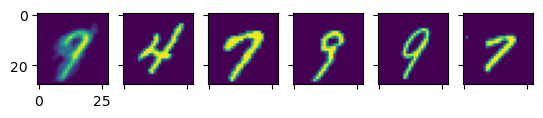

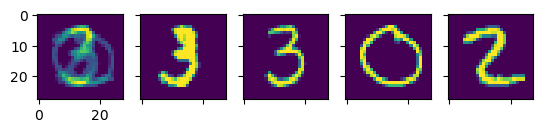

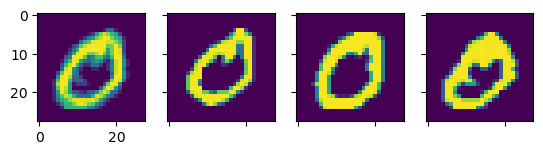

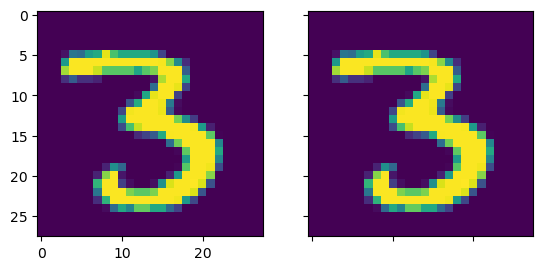

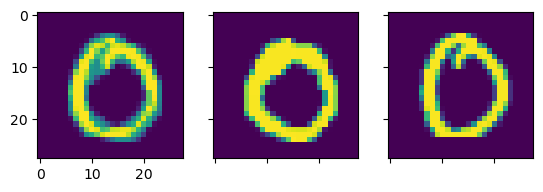

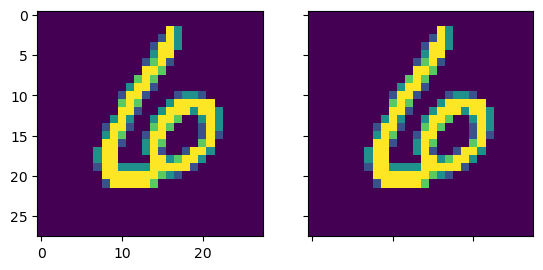

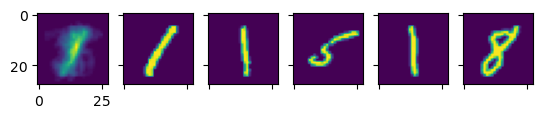

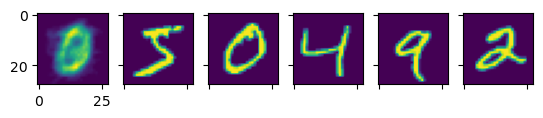

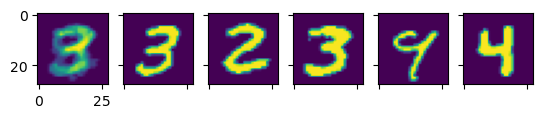

In [39]:
for i in range(9):
    visual_cluster_data(i)

## Giảm chiều dữ liệu sau đó phân cụm và trực quan

Giảm chiều dữ liệu

In [40]:
def myPCA(X, k = 3):
    X = X.T
    N  = X.shape[1]
    X_bar = X.mean(axis=1).reshape(-1, 1)
    X_hat = X - X_bar
    S = (X_hat @ X_hat.T) / N
    SVD = np.linalg.svd(S)
    U = SVD[0]
    lambd = SVD[1]
    Z = U[:, :k].T @ X_hat
    z = Z.T
    return z

In [41]:
THRESHOLD = 1000
X = X_train[:THRESHOLD]
z = myPCA(X, k = 3)
pc1 = z[:, 0]
pc2 = z[:, 1]
pc3 = z[:, 2]

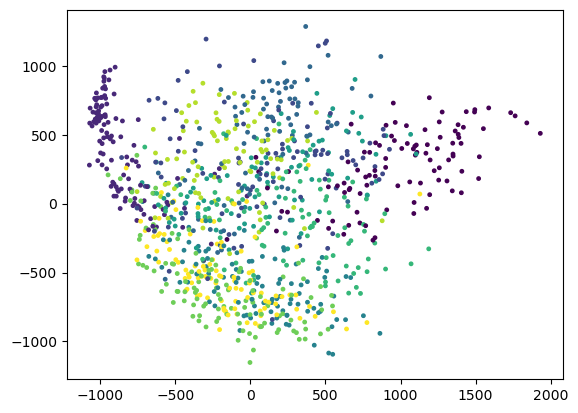

In [42]:
plt.scatter(pc1, pc2, c = y_train[:THRESHOLD], s=6)
plt.show()

In [43]:
X = np.array((pc1, pc2, pc3)).T
X.shape

(1000, 3)

In [44]:
cost, index, c, centroids = myKmeans(X[:THRESHOLD].T, 9)
print(f"\nCost = {cost}, \nIndex={index},\nCentroid: \n {centroids}")


Cost = 399.60705575603504, 
Index=317,
Centroid: 
 [[ -10 -572  338]
 [ 490  222 -732]
 [1197  384   -8]
 [  22  479 -236]
 [-582  -21  309]
 [ 376  362  706]
 [-890  588 -103]
 [-320 -281 -362]
 [ 316 -674 -286]]


Hiển thị dữ liệu dưới dạng hai chiều cùng với tâm cụm

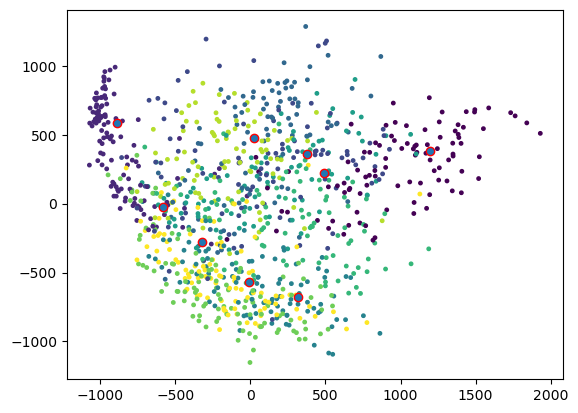

In [45]:
plt.scatter(pc1, pc2, c = y_train[:THRESHOLD], s=6)
plt.scatter(centroids.T[0],centroids.T[1], edgecolors='red', cmap='ro')
plt.show()

Đối với đoạn code dưới đây, cần chạy lại để có thể hiển thị 3D

In [46]:
from ipywidgets import interact

def plot_3d(elev=20, azim=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(pc1, pc2, pc3, c = y_train[:THRESHOLD], s = 6)
    # ax.scatter3D(centroids.T[0],centroids.T[1], centroids.T[2], edgecolors='red')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(-90, 90), azim=(-180, 180))

interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

<function __main__.plot_3d(elev=20, azim=30)>